# IEEE Fraud Detection Kaggle Competition
## LightGBM Baseline

In [1]:
%%bash

ls -l

cd data 

ls -l

total 11736
-rw-r--r--  1 cchadha2  MS\Domain Users  1976809 Aug  5 23:42 EDA.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users  1661687 Jul 29 22:42 IDs-EDA.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   222386 Aug  7 22:18 adverserial_validation.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   237097 Aug  7 15:28 lightgbm_baseline.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   228209 Aug  8 11:36 lightgbm_card1_count_encoded.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   228209 Aug  8 13:35 lightgbm_card1_count_encoded_20kval.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   867988 Jul 30 18:23 log_reg.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   573592 Aug  7 22:19 val_indices_>0.5.npy
total 11736
-rw-r--r--  1 cchadha2  MS\Domain Users  1976809 Aug  5 23:42 EDA.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users  1661687 Jul 29 22:42 IDs-EDA.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   222386 Aug  7 22:18 adverserial_validation.ipynb
-rw-r--r--  1 cchadha2  MS\Domain Users   237097 Aug

bash: line 4: cd: data: No such file or directory


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

/Users/cchadha2/anaconda3/envs/eda/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
pd.set_option('display.max_columns', 500)
num_folds = 5
SEED = 5000

# Load and prepare data

In [4]:
train = pd.read_csv('../output/merged_train.csv')
test = pd.read_csv('../output/merged_test.csv')

In [5]:
train.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [52]:
train['addr2'].value_counts()

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
102.0        11
29.0         11
98.0         11
57.0         10
68.0         10
10.0          8
78.0          8
71.0          7
13.0          7
17.0          7
54.0          6
72.0          6
73.0          5
21.0          5
52.0          5
88.0          5
          ...  
40.0          3
46.0          3
61.0          3
36.0          2
100.0         2
86.0          2
76.0          2
97.0          2
92.0          2
66.0          2
63.0          2
23.0          2
70.0          1
14.0          1
15.0          1
77.0          1
22.0          1
94.0          1
25.0          1
84.0          1
93.0          1
79.0          1
82.0          1
89.0          1
83.0          1
35.0          1
55.0          1
50.0          1
49.0          1
75.0          1
Name: addr2, Length: 74,

In [6]:
print(train.shape)

(590540, 434)


In [7]:
print(test.shape)

(506691, 433)


In [8]:
# Lightgbm parameters from https://www.kaggle.com/vincentlugat/ieee-lgb-bayesian-opt
params = {
        'bagging_fraction': 0.8999999999997461,
        'feature_fraction': 0.8999999999999121,
        'max_depth': int(50.0),
        'min_child_weight': 0.0029805017044362268,
        'min_data_in_leaf': int(20.0),
        'num_leaves': int(381.85354295079446),
        'reg_alpha': 1.0,
        'reg_lambda': 2.0,
        'objective': 'binary',
        'save_binary': True,
        'seed': SEED,
        'feature_fraction_seed': SEED,
        'bagging_seed': SEED,
        'drop_seed': SEED,
        'data_random_seed': SEED,
        'boosting_type': 'gbdt',
        'verbose': 1,
        'is_unbalance': False,
        'boost_from_average': True,
        'metric':'auc'
    }

early_rounds = 50
num_iterations = 200

In [9]:
categorical_features=['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                      'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1',
                      'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                      'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15',
                      'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
                      'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
                      'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
                      'id_37', 'id_38']

In [10]:
for feature in categorical_features:
    train[feature] = train[feature].astype('category')
    test[feature] = test[feature].astype('category')

In [11]:
# Count encoded card_1 feature from https://www.kaggle.com/nroman/eda-for-cis-fraud-detection
train['card1_count'] = train['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
test['card1_count'] = test['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))

# Splitting into train, val, and test

In [12]:
# Split train into features and target
X = train.drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train['isFraud']

In [13]:
val_indices = np.load('../output/val_indices_>0.5.npy')

In [14]:
val_indices

array([   428,   2163,   2959, ..., 590528, 590529, 590538])

In [15]:
X_val = X.iloc[val_indices, :]
y_val = y.iloc[val_indices]

In [16]:
X_train = X.drop(val_indices)
y_train = y.drop(val_indices)

In [17]:
y_val.value_counts()

0    69798
1     1885
Name: isFraud, dtype: int64

In [18]:
X_train.shape

(518857, 432)

In [19]:
X_val.shape

(71683, 432)

In [20]:
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)

# Train LightGBM

In [22]:
# Create arrays for oof predictions and sub predictions
val_preds = np.zeros(len(X_val))

In [23]:
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

In [24]:
clf = lgb.train(params, trn_data, num_iterations, valid_sets=[trn_data, val_data], verbose_eval=1,
                early_stopping_rounds=early_rounds)

/Users/cchadha2/anaconda3/envs/eda/lib/python3.7/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	training's auc: 0.911742	valid_1's auc: 0.791847
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.925118	valid_1's auc: 0.816456
[3]	training's auc: 0.936905	valid_1's auc: 0.823452
[4]	training's auc: 0.94288	valid_1's auc: 0.8262
[5]	training's auc: 0.948605	valid_1's auc: 0.830787
[6]	training's auc: 0.953545	valid_1's auc: 0.836576
[7]	training's auc: 0.955948	valid_1's auc: 0.839813
[8]	training's auc: 0.958328	valid_1's auc: 0.840835
[9]	training's auc: 0.96079	valid_1's auc: 0.844274
[10]	training's auc: 0.96312	valid_1's auc: 0.846698
[11]	training's auc: 0.965311	valid_1's auc: 0.850481
[12]	training's auc: 0.967175	valid_1's auc: 0.853427
[13]	training's auc: 0.969235	valid_1's auc: 0.856285
[14]	training's auc: 0.971395	valid_1's auc: 0.861191
[15]	training's auc: 0.972923	valid_1's auc: 0.864545
[16]	training's auc: 0.974495	valid_1's auc: 0.867026
[17]	training's auc: 0.975718	valid_1's auc: 0.869428
[18]	training's auc: 0.977166	vali

[152]	training's auc: 0.999951	valid_1's auc: 0.906664
[153]	training's auc: 0.999953	valid_1's auc: 0.906589
[154]	training's auc: 0.999955	valid_1's auc: 0.906521
[155]	training's auc: 0.999957	valid_1's auc: 0.906462
[156]	training's auc: 0.999959	valid_1's auc: 0.906576
[157]	training's auc: 0.999961	valid_1's auc: 0.906327
[158]	training's auc: 0.999963	valid_1's auc: 0.906228
[159]	training's auc: 0.999965	valid_1's auc: 0.905962
[160]	training's auc: 0.999966	valid_1's auc: 0.905972
[161]	training's auc: 0.999968	valid_1's auc: 0.906075
[162]	training's auc: 0.999969	valid_1's auc: 0.906264
[163]	training's auc: 0.999969	valid_1's auc: 0.90611
[164]	training's auc: 0.999971	valid_1's auc: 0.906196
[165]	training's auc: 0.999971	valid_1's auc: 0.906219
[166]	training's auc: 0.999973	valid_1's auc: 0.906118
[167]	training's auc: 0.999974	valid_1's auc: 0.906121
[168]	training's auc: 0.999975	valid_1's auc: 0.905991
[169]	training's auc: 0.999976	valid_1's auc: 0.905895
[170]	train

# Predict on test sets

In [25]:
val_preds = clf.predict(X_val, num_iteration=clf.best_iteration)

In [26]:
print('AUROC on validation set: {}'.format(roc_auc_score(y_val.values, val_preds)))

AUROC on validation set: 0.9072479522757715


In [27]:
# Bootstrapping AUROC
n_bootstraps = 10000
bootstrapped_scores = []

np.random.seed(SEED)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = np.random.randint(0, len(val_preds) - 1, len(val_preds))
    if len(np.unique(y_val.values[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_val.values[indices], val_preds[indices])
    bootstrapped_scores.append(score)

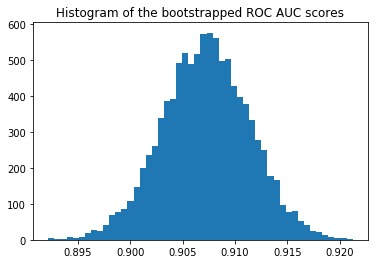

In [28]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [29]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.900 - 0.914]


In [30]:
sorted_scores.mean()

0.9072366031541133

In [31]:
sorted_scores.std()

0.004156588837971901

In [38]:
test.TransactionDT.min()

18403224

In [41]:
test.TransactionDT.max()

34214345

In [42]:
train.TransactionDT.min()

86400

In [40]:
train.TransactionDT.max()

15811131

In [50]:
2*10**6/60/60

9.25925925925926

In [43]:
val_indices = np.load('../output/val_indices.npy')

In [45]:
val_indices.std()

106529.5210194611

In [48]:
val_indices.max()

590529

In [49]:
val_indices

array([  5949,  10454,  12753, ..., 590520, 590526, 590529])

In [32]:
y_val.value_counts()

0    69798
1     1885
Name: isFraud, dtype: int64

In [36]:
(1885*100)/(69798+1885)

2.6296332463764074

# Feature importances

In [ ]:
# Concatenate fold importances into feature importance dataframe
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns.tolist()
feature_importance_df["importance"] = clf.feature_importance()

In [ ]:
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))